<a href="https://colab.research.google.com/github/declan-healy/x-ray-fluorescence/blob/main/Experiment_A2_X_ray_fluorescence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!git pull "https://github.com/declan-healy/x-ray-fluorescence.git"

From https://github.com/declan-healy/x-ray-fluorescence
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

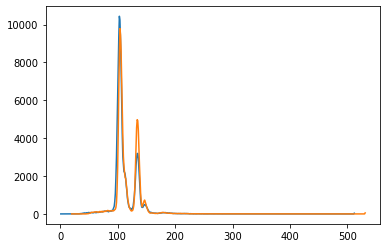

In [125]:
x_axis = np.linspace(1,512,512)
w1_df = pd.read_csv("4 values.txt",  encoding = "ISO-8859-1", delimiter = "\t", skiprows = 4)
#
w1_df.iloc[:,0] = x_axis
#
w1_n1 = w1_df.iloc[:,1]
w1_n2 = w1_df.iloc[:,2]
w1_n3 = w1_df.iloc[:,3]
w1_n4 = w1_df.iloc[:,4]
w1_n5 = w1_df.iloc[:,5]
w1_n6 = w1_df.iloc[:,6]
plt.plot(x_axis,w1_n1)

w2_df = pd.read_csv("50 Euro cent (text).txt",  encoding = "ISO-8859-1", delimiter = "\t", skiprows = 4)
#
w2_df.iloc[:,0] = x_axis + 19
#50c (euro)
w2_n1 = w2_df.iloc[:,1]
#1 dime (US)
w2_n2 = w2_df.iloc[:,2]
#£1 (UK)
w2_n3 = w2_df.iloc[:,3]
#Galvinised steel sample
w2_n4 = w2_df.iloc[:,4]
#2p (UK)
w2_n5 = w2_df.iloc[:,5]
#Rupee (Indian)
w2_n6 = w2_df.iloc[:,6]
#alloy number 4
w2_n7 = w2_df.iloc[:,7]
#alloy number 3
w2_n8 = w2_df.iloc[:,8]
w2_n9 = w2_df.iloc[:,9]
w2_n10 = w2_df.iloc[:,10]
w2_n11 = w2_df.iloc[:,11]
w2_n12 = w2_df.iloc[:,12]
w2_df_callibration = pd.read_csv("CONTROL `1.txt",  encoding = "ISO-8859-1", delimiter = "\t", skiprows = 4)
#w2_n0 = w2_df_callibration.iloc[:,1]
plt.plot(w2_df.iloc[:,0],w2_n4)

AttributeError: ignored

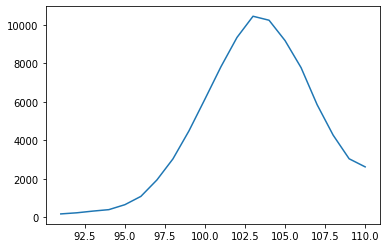

In [143]:
w1_df_trimmed = w1_df.iloc[90:110,:]
plt.plot(w1_df_trimmed.iloc[:,0],w1_df_trimmed.iloc[:,1])
w1_df_trimmed.query('w1_df.iloc[90:110,:]')

In [127]:
w1_df.iloc[:,0]


0       20.0
1       21.0
2       22.0
3       23.0
4       24.0
       ...  
507    527.0
508    528.0
509    529.0
510    530.0
511    531.0
Name: DEF="Energy" E / s, Length: 512, dtype: float64
